In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [ ]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

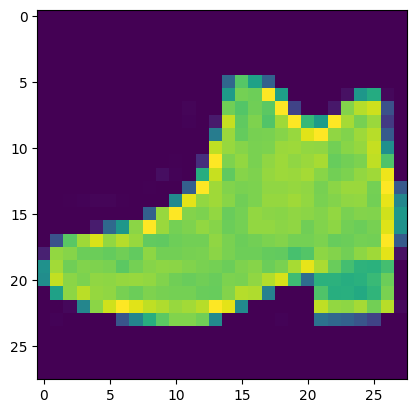

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[15]);

In [ ]:
train_label[15]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [ ]:
train_data=train_data.reshape(-1,28,28,1)
test_data=test_data.reshape(-1,28,28,1)

train_data=train_data/255.0
test_data=test_data/255.0

In [ ]:
train_data.shape,test_data.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label = tf.keras.utils.to_categorical(test_label)

In [ ]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      train_label,
                      epochs=20,
                      validation_data=(test_data,test_label))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5899 - accuracy: 0.7900 - val_loss: 0.4339 - val_accuracy: 0.8483
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3890 - accuracy: 0.8600 - val_loss: 0.4765 - val_accuracy: 0.8403
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8713 - val_loss: 0.3901 - val_accuracy: 0.8591
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3288 - accuracy: 0.8798 - val_loss: 0.3976 - val_accuracy: 0.8588
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8839 - val_loss: 0.3700 - val_accuracy: 0.8678
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3009 - accuracy: 0.8893 - val_loss: 0.3650 - val_accuracy: 0.8696
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2918 - accuracy: 0.8926 - val_loss: 0.3853 - val_accuracy:

In [ ]:
model_1.evaluate(test_data,test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8810


[0.38301604986190796, 0.8809999823570251]

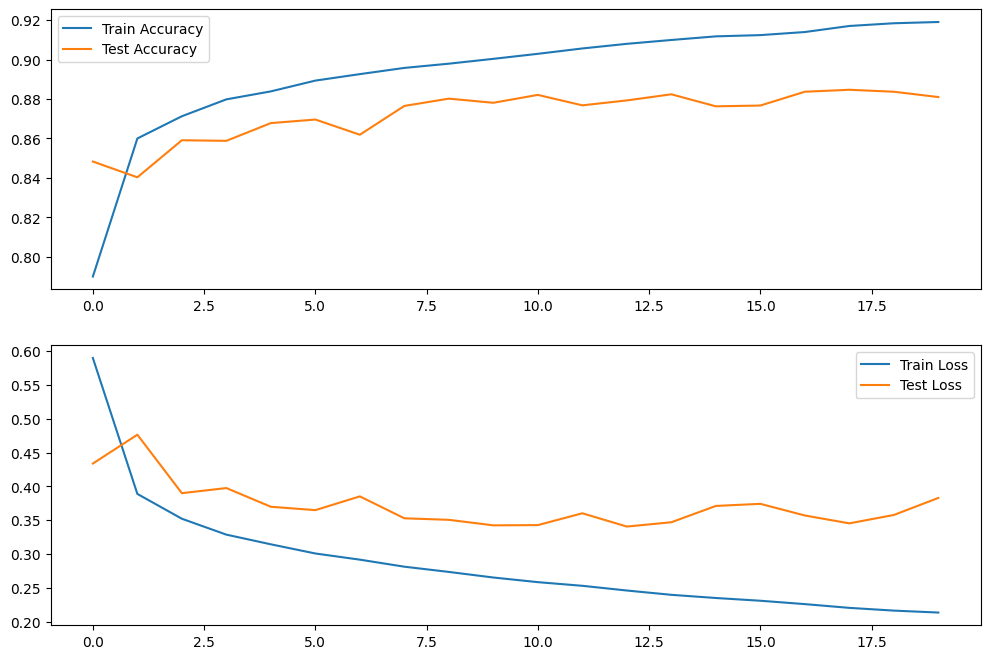

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].plot(history_1.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_1.history['val_accuracy'], label='Test Accuracy')

ax[1].plot(history_1.history['loss'], label='Train Loss')
ax[1].plot(history_1.history['val_loss'], label='Test Loss')

ax[0].legend()
ax[1].legend()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='tanh',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

callback = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('best.h5', monitor='val_loss', save_best_only=True,verbose=1)
]

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
                      train_label,
                      epochs=20,
                      validation_data=(test_data,test_label), callbacks=callback)

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.7367 - accuracy: 0.7148
Epoch 1: val_loss improved from inf to 0.50329, saving model to best.h5
1875/1875 [==============================] - 98s 51ms/step - loss: 0.7367 - accuracy: 0.7148 - val_loss: 0.5033 - val_accuracy: 0.8019
Epoch 2/20
   3/1875 [..............................] - ETA: 1:18 - loss: 0.5814 - accuracy: 0.8333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8371
Epoch 2: val_loss improved from 0.50329 to 0.41137, saving model to best.h5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.4309 - accuracy: 0.8371 - val_loss: 0.4114 - val_accuracy: 0.8519
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8699
Epoch 3: val_loss improved from 0.41137 to 0.35712, saving model to best.h5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.3583 - accuracy: 0.8699 - val_loss: 0.3571 - val_accuracy: 0.8709
Epoch 4/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8864
Epoch 4: val_loss improved from 0.35712 to 0.33541, saving model to best.h5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.3108 - accuracy: 0.8864 - val_loss: 0.3354 - val_accuracy: 0.8778
Epoch 5/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.2780 - acc

In [ ]:
model_2.evaluate(test_data,test_label)

313/313 [==============================] - 5s 17ms/step - loss: 0.3057 - accuracy: 0.8989


[0.30570587515830994, 0.8988999724388123]

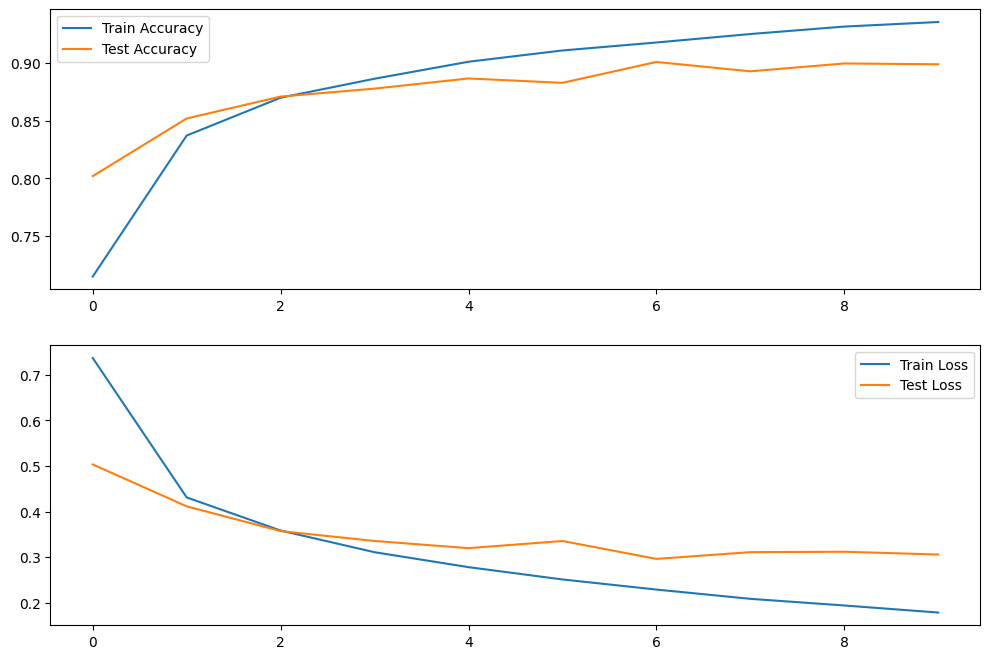

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].plot(history_2.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_2.history['val_accuracy'], label='Test Accuracy')

ax[1].plot(history_2.history['loss'], label='Train Loss')
ax[1].plot(history_2.history['val_loss'], label='Test Loss')

ax[0].legend()
ax[1].legend()